#Python Notebook 2
- Author - D.M.G. Pamodi Pansiluni
- UoW ID - w2053166
- IIT ID - 20230614
- Peer Review - Dhanushi Dewmindi



Reused from Coursework Code Reuse Session 2 (Week 7): Imports the necessary libraries for building and evaluating classification models, including Naïve Bayes, Logistic Regression, K-Nearest Neighbors, and metrics for model evaluation.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load the preprocessed dataset (from Notebook 1)
data = pd.read_csv('/content/drive/MyDrive/Final_Datasets/preprocessed_data.csv')

Reused from Coursework Code Reuse Session 2 (Week 7): Retrieves and prints the feature names from the dataset, excluding the target variable ('Mortality_Status'), to prepare for classification modeling.

In [8]:
# Get feature names (excluding the target variable)
feature_names = data.drop(columns=['Mortality_Status']).columns.tolist()
print("Feature Names:", feature_names)

Feature Names: ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']


Code Reuse from Coursework Data Understanding and Preparation (Session 1)
This code block is reused to explore the basic structure of the dataset by retrieving its shape

In [9]:
# Get data shape
data_shape = data.shape
print("Data Shape:", data_shape)

Data Shape: (4023, 15)


Reused from Code Reuse Session 1 (Week 5). This block uses head() to preview the first few rows of the dataset for initial inspection and structure verification.

In [10]:
# Check the first few rows of the data
print(data.head())

        Age     Sex T_Stage N_Stage 6th_Stage             Differentiated  \
0  0.750000  Female      T1      N1       IIA      Poorly differentiated   
1  0.428571  Female      T2      N2      IIIA  Moderately differentiated   
2  0.571429  Female      T3      N3      IIIC  Moderately differentiated   
3  0.571429  Female      T1      N1       IIA      Poorly differentiated   
4  0.375000  Female      T2      N1       IIB      Poorly differentiated   

      Grade   A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
0  0.666667  Regional    0.042857        Positive            Positive   
1  0.333333  Regional    0.485714        Positive            Positive   
2  0.333333  Regional    0.885714        Positive            Positive   
3  0.666667  Regional    0.242857        Positive            Positive   
4  0.666667  Regional    0.571429        Positive            Positive   

   Regional_Node_Examined  Reginol_Node_Positive  Survival_Months  \
0                0.696970          

Reused from Code Reuse Session 1 (Week 5). This block applies Label Encoding to convert categorical (object-type) features into numeric values, preparing the data for machine learning models that require numerical input.

In [11]:
# Convert categorical variables to numeric using Label Encoding
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

Reused from Code Reuse Session 2 - Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block defines the feature matrix X by dropping the target column 'Mortality_Status', and assigns the target variable y for classification modelling of cancer mortality status.

In [12]:
# Define features and target variable
X = data.drop(columns=['Mortality_Status'])
y = data['Mortality_Status']

Reused from Code Reuse Session 2 - Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block standardizes the feature set using StandardScaler to ensure all features have a mean of 0 and standard deviation of 1, improving model performance and convergence.

In [13]:
# Standardize the feature set
scaler = StandardScaler()
X = scaler.fit_transform(X)

Reused from Code Reuse Session 2 – Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block splits the data into training and testing sets in an 80/20 ratio. Stratification is applied on the target variable to preserve class distribution, ensuring balanced representation for effective model training and evaluation.

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Reused from Code Reuse Session 2 – Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block checks the class distribution in the training set using value_counts(normalize=True) to confirm that stratification preserved the label balance after the data split.

In [15]:
# Training set label ratio:
print(y_train.value_counts(normalize=True))

Mortality_Status
0    0.846799
1    0.153201
Name: proportion, dtype: float64


Reused from Code Reuse Session 2 – Mortality Status Classification Modelling & Hyperparameters Tuning  (Week 7). This block checks the label distribution in the testing set to confirm stratification preserved class balance.

In [16]:
# Testing set label ratio:
print(y_test.value_counts(normalize=True))

Mortality_Status
0    0.847205
1    0.152795
Name: proportion, dtype: float64


Reused from Code Reuse Session 2 – Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block trains a Naïve Bayes model and evaluates its performance on the test set using the classification report.

In [17]:
# Model 1: Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       682
           1       0.39      0.50      0.44       123

    accuracy                           0.80       805
   macro avg       0.65      0.68      0.66       805
weighted avg       0.83      0.80      0.81       805



Reused from Code Reuse Session 2  – Mortality Status Classification Modelling & Hyperparameters Tuning  (Week 7). This block trains a Logistic Regression model with the 'saga' solver and evaluates its performance on the test set using the classification report.

In [18]:
# Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=2000, solver='saga')
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       682
           1       0.78      0.44      0.56       123

    accuracy                           0.90       805
   macro avg       0.84      0.71      0.75       805
weighted avg       0.89      0.90      0.88       805



In [19]:
# Model 3: K-Nearest Neighbours
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbours Classification Report:")
print(classification_report(y_test, knn_predictions))

K-Nearest Neighbours Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       682
           1       0.66      0.35      0.46       123

    accuracy                           0.87       805
   macro avg       0.78      0.66      0.69       805
weighted avg       0.86      0.87      0.86       805



Reused from Code Reuse Session 2 – Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block generates and prints the confusion matrix for the Naïve Bayes model to evaluate the true positives, false positives, true negatives, and false negatives.

In [20]:
# Confusion Matrix for Naïve Bayes
nb_predictions = nb_model.predict(X_test)
cm_nb = confusion_matrix(y_test, nb_predictions)
print(f'Confusion Matrix for Naïve Bayes Model:\n', cm_nb)

Confusion Matrix for Naïve Bayes Model:
 [[586  96]
 [ 62  61]]


In [21]:
# Confusion Matrix for Logistic Regression
lr_predictions = lr_model.predict(X_test)
cm_lr = confusion_matrix(y_test, lr_predictions)
print(f'Confusion Matrix for Logistic Regression Model:\n', cm_lr)

Confusion Matrix for Logistic Regression Model:
 [[667  15]
 [ 69  54]]


In [22]:
# Model 3: K-Nearest Neighbours
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Confusion matrix for KNN before tuning
cm_before = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix for KNN Before Tuning:\n", cm_before)

Confusion Matrix for KNN Before Tuning:
 [[660  22]
 [ 80  43]]


In [23]:
# Classification report for KNN before tuning
print("Classification Report for KNN Before Tuning:\n", classification_report(y_test, knn_predictions))

Classification Report for KNN Before Tuning:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       682
           1       0.66      0.35      0.46       123

    accuracy                           0.87       805
   macro avg       0.78      0.66      0.69       805
weighted avg       0.86      0.87      0.86       805



Reused from Code Reuse Session 2 – Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7) (Week 7). This block tunes hyperparameters for KNN using GridSearchCV to find the best parameters and trains the model with the optimal configuration.

In [24]:
# Hyperparameter tuning with GridSearchCV for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best KNN parameters: {grid_search.best_params_}')

# Build the model with the best parameters
best_knn_model = grid_search.best_estimator_


Best KNN parameters: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [25]:
# Evaluate the tuned KNN model
best_knn_predictions = best_knn_model.predict(X_test)

# Confusion matrix for KNN after tuning
cm_after = confusion_matrix(y_test, best_knn_predictions)
print("Confusion Matrix for KNN After Tuning:\n", cm_after)

Confusion Matrix for KNN After Tuning:
 [[670  12]
 [ 81  42]]


Reused from Code Reuse Session 2 – Mortality Status Classification Modelling & Hyperparameters Tuning  (Week 7). This block evaluates the performance of the tuned KNN model on the test set using the classification report.

In [26]:
# Classification report for KNN after tuning
print("Classification Report for KNN After Tuning:\n", classification_report(y_test, best_knn_predictions))

Classification Report for KNN After Tuning:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       682
           1       0.78      0.34      0.47       123

    accuracy                           0.88       805
   macro avg       0.83      0.66      0.70       805
weighted avg       0.87      0.88      0.86       805



Reused from Code Reuse Session 2 – Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block calculates and plots the ROC curve for the Naïve Bayes model, displaying the false positive rate (FPR) versus the true positive rate (TPR), and computes the Area Under the Curve (AUC) to assess the model’s performance.

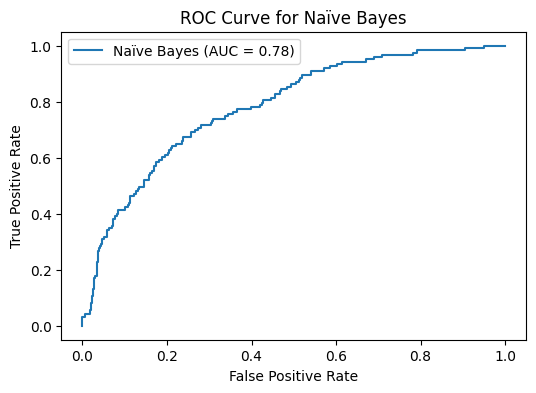

In [27]:
# AUC-ROC Curve for Naive Bayes
nb_proba = nb_model.predict_proba(X_test)[:, 1] # Get predicted probabilities for the positive class (class 1) from the Naive Bayes model.
fpr, tpr, _ = roc_curve(y_test, nb_proba) # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds using the roc_curve function.
nb_auc = roc_auc_score(y_test, nb_proba) # Calculate the Area Under the ROC Curve (AUC) score using the roc_auc_score function.

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Naïve Bayes (AUC = {nb_auc:.2f})') # Plot the ROC curve with fpr on the x-axis and tpr on the y-axis. Include the AUC score in the label.
plt.xlabel('False Positive Rate') # Set the label for the axises.
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naïve Bayes')
plt.legend() # Display the legend, showing the model name and AUC score.
plt.show() # Show the plot.

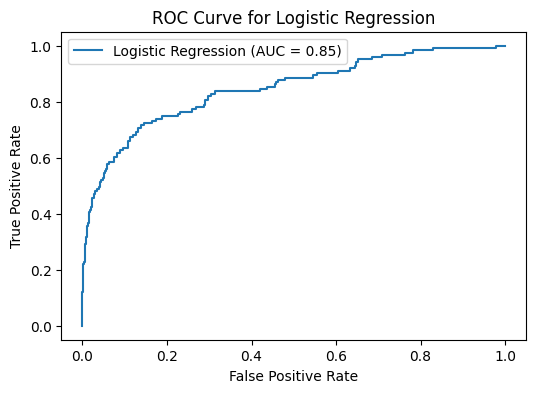

In [28]:
# AUC-ROC Curve for Logistic Regression
lr_proba = lr_model.predict_proba(X_test)[:, 1] # Get the predicted probabilities for the positive class (class 1) for the Logistic Regression model.
fpr, tpr, _ = roc_curve(y_test, lr_proba) # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds using the roc_curve function.
lr_auc = roc_auc_score(y_test, lr_proba) # Calculate the Area Under the ROC Curve (AUC) score using the roc_auc_score function.

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})') # Plot the ROC curve with fpr on the x-axis and tpr on the y-axis. Include the AUC score in the label.
plt.xlabel('False Positive Rate') # Set the label for the axises.
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show() # Show the plot.

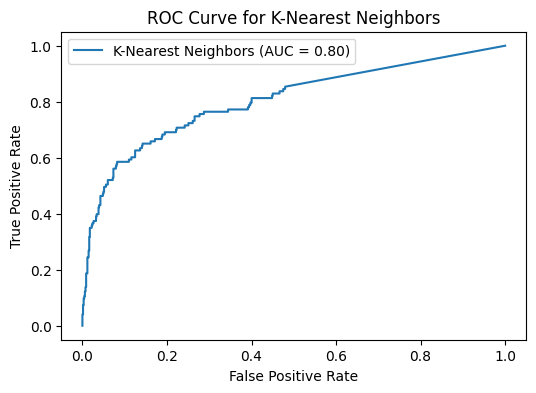

In [29]:
# AUC-ROC Curve for K-Nearest Neighbors
knn_proba = best_knn_model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
fpr, tpr, _ = roc_curve(y_test, knn_proba)  # Calculate ROC curve points
knn_auc = roc_auc_score(y_test, knn_proba)  # Calculate AUC score

plt.figure(figsize=(6, 4))  # Create figure
plt.plot(fpr, tpr, label=f'K-Nearest Neighbors (AUC = {knn_auc:.2f})')  # Plot ROC curve
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.title('ROC Curve for K-Nearest Neighbors')  # Plot title
plt.legend()  # Show legend
plt.show()  # Display plot


Reused from Code Reuse Session 2 – Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block plots the ROC curves for multiple models (Naïve Bayes, Logistic Regression, and KNN) on the same graph, comparing their performance by visualizing the false positive rate (FPR) against the true positive rate (TPR), and including the AUC scores for each model.

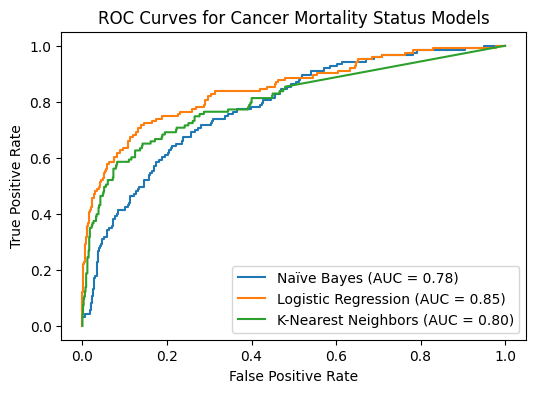

In [30]:
# Assuming nb_model, lr_model, best_knn_model are defined
models = [ # Creates a list of models with their names.
    ("Naïve Bayes", nb_model),
    ("Logistic Regression", lr_model),
    ("K-Nearest Neighbors", best_knn_model),
]

plt.figure(figsize=(6, 4)) # Creates a new figure with a specific size.
for name, model in models:
    if hasattr(model, "predict_proba"): # Checks if the model has a predict_proba method.
        y_proba = model.predict_proba(X_test)[:, 1] # Gets the predicted probabilities for the positive class.
        fpr, tpr, _ = roc_curve(y_test, y_proba) # Calculates the false positive rate, true positive rate, and thresholds.
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})') # Plots the ROC curve with the AUC score in the label.

plt.xlabel('False Positive Rate') # set the axises
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Cancer Mortality Status Models')
plt.legend()
plt.show() # Shows the plot.